In [1]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


shp_file_name = r"gda2020\nsw_localities.shp"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = (
    "https://data.gov.au/data/dataset/"
    "91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
    "5e295412-357c-49a2-98d5-6caf099c2339/download/"
    "nsw_locality_polygon_shp.zip"
)

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [4]:
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


In [5]:
burbs = gp.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
burbs.sample(2)

,LC_PLY_PID,LOC_PID,DT_CREATE,LOC_NAME,LOC_CLASS,STATE,geometry
3071,lcp634502f51d36,locf8dee8727250,2021-06-24,North Parramatta,Gazetted Locality,NSW,"POLYGON ((151.017 -33.780, 151.018 -33.780, 15..."
1732,lcp46829a7d647b,loc472fbd6ff1f8,2022-03-11,Gobarralong,Gazetted Locality,NSW,"POLYGON ((148.374 -34.858, 148.376 -34.858, 14..."


In [6]:
cols_to_drop = ["NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4","NSW_LOCA_5","NSW_LOCA_7", "DT_RETIRE"]
burbs.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
burbs.head(2)

,LC_PLY_PID,LOC_PID,DT_CREATE,LOC_NAME,LOC_CLASS,STATE,geometry
0,lcp012ec80364d0,loc56c2712d9100,2021-06-24,Aarons Pass,Gazetted Locality,NSW,"POLYGON ((149.795 -32.823, 149.794 -32.828, 14..."
1,lcp17fc6b0c3f1e,loc826143633965,2022-09-28,Abbotsbury,Gazetted Locality,NSW,"POLYGON ((150.873 -33.860, 150.873 -33.861, 15..."


LC_PLY_PID                                      lcp012ec80364d0
LOC_PID                                         loc56c2712d9100
DT_CREATE                                            2021-06-24
LOC_NAME                                            Aarons Pass
LOC_CLASS                                     Gazetted Locality
STATE                                                       NSW
geometry      POLYGON ((149.79499744848894 -32.8227401143710...
Name: 0, dtype: object


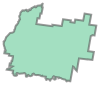

In [7]:
a = burbs.iloc[0]
print(a)
a.geometry

In [8]:
def add_centroid(row):
    return row.geometry.centroid

burbs["centroid"] = burbs.apply(add_centroid, axis=1)

burbs.sample(2)

,LC_PLY_PID,LOC_PID,DT_CREATE,LOC_NAME,LOC_CLASS,STATE,geometry,centroid
327,lcptoaNWbnLR9Cm,locc53301563bf8,2023-12-10,Berthong,Gazetted Locality,NSW,"POLYGON ((148.015 -34.314, 148.016 -34.314, 14...",POINT (148.09555 -34.38898)
284,lcp0f9f436cc35c,locc43bec53986d,2021-06-24,Belowra,Gazetted Locality,NSW,"POLYGON ((149.650 -35.976, 149.650 -35.976, 14...",POINT (149.68438 -36.10378)


<Axes: >

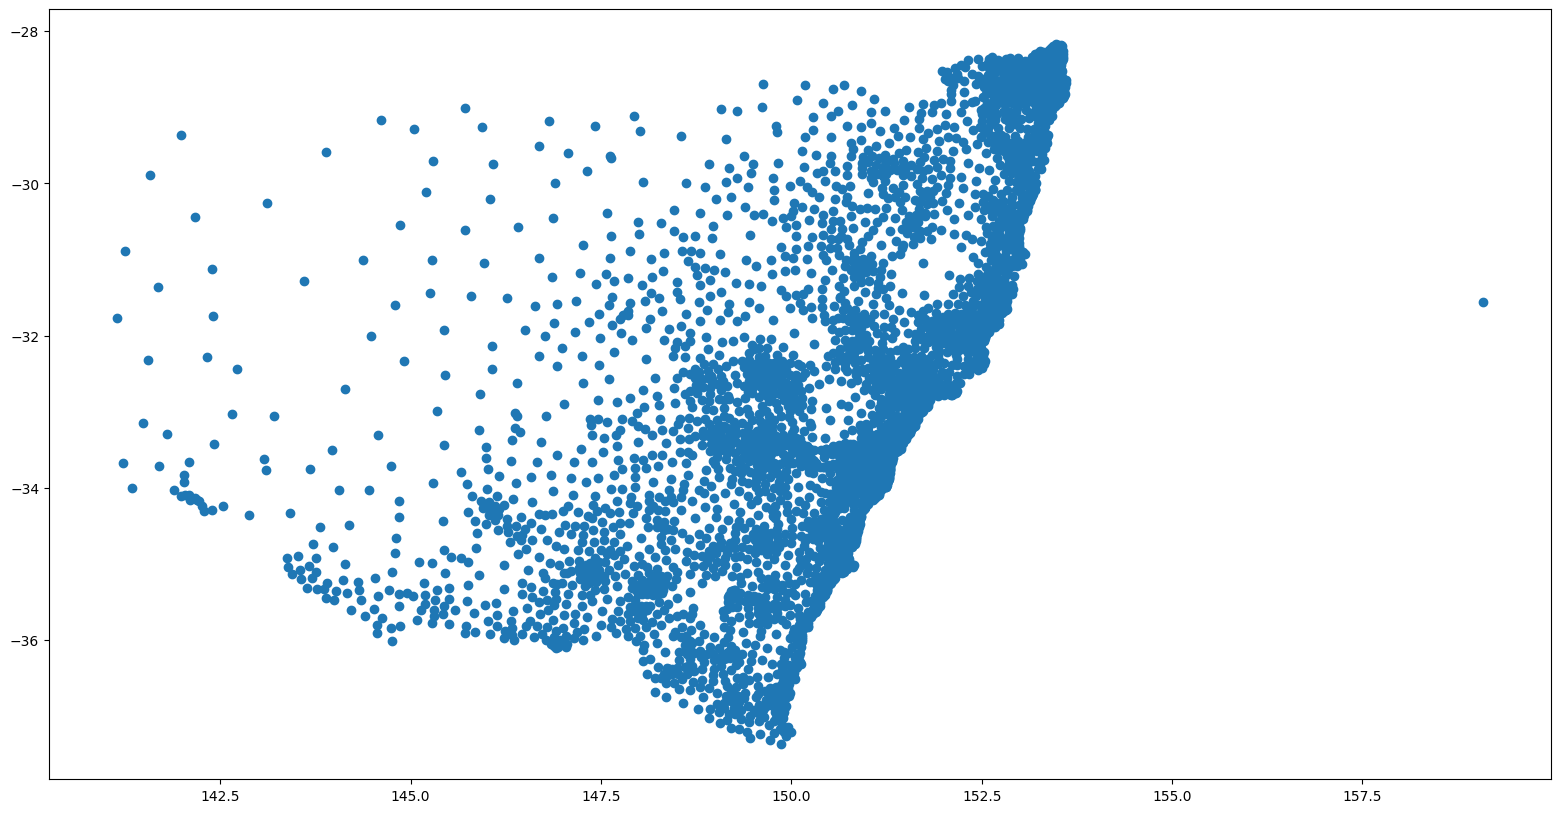

In [9]:
burbs.centroid.plot()

In [10]:
bf_read = gp.read_file("bushfire-water-quality-dataset.csv")
bf_read.head()

,Date,Time Frame,Estuary,Zone,Dissolved oxygen (% saturation),Salinity (psu),pH,Chlorophyll-a (ug/L),"Blue green alage (BGA, ug/L)",Turbidity (NTU),fDOM (RFU),Dissolved nitrogen (ug/L),Total nitrogen (ug/L),Dissolved phosphorus (ug/L),Total phosphorus (ug/L),"Nitrogen oxides (NOx, ug/L)","Ammonia (NH3, ug/L)","Phosphate (PO4 3-, ug/L",geometry
0,31/10/2017,Pre-fire,Lake Conjola,1,102.1,33,7.97,2.63,5.56,1,3,208.4,326.5,12.34,22.6,1,3,0,None
1,31/10/2017,Pre-fire,Lake Conjola,2,104.4,34,8.05,1.5,2.32,0,2,,,,,,,,None
2,23/11/2017,Pre-fire,Lake Conjola,1,96.9,33,7.92,2.5,6.15,1,3,,,,,,,,None
3,23/11/2017,Pre-fire,Lake Conjola,2,98.1,34,8,1.06,2.39,1,2,,,,,,,,None
4,19/12/2017,Pre-fire,Lake Conjola,1,100.3,34,7.8,2.61,3.56,1,4,225.7,287.7,-1.97426,6.388,0.03515,0.2326,0.6248,None


In [30]:
addreses = [f"{x}, Australia" for x in bf_read.Estuary.unique()]
estuary_loc_df = gp.tools.geocode(addreses)
estuary_loc_df["Estuary"] = bf_read.Estuary.unique()
estuary_loc_df

,geometry,address,Estuary
0,POINT (150.48912 -35.26980),"Lake Conjola, 2539, New South Wales, Australia",Lake Conjola
1,POINT (150.30111 -35.64833),"Durras Lake, New South Wales, Australia",Durras Lake
2,POINT (152.46843 -32.01202),"Khappinghat Creek, 2430, Australia",Khappinghat Creek
3,POINT (150.38514 -35.48396),"Meroo Lake, 2539, Australia",Meroo Lake
4,POINT (150.38755 -35.46131),"Termeil Lake, 2539, Australia",Termeil Lake
5,POINT (150.11384 -36.31759),"Lake Tilba Tilba, 2546, Australia",Tilba Tilba Lake
6,POINT (152.48614 -32.38441),"Smiths Lake, 2428, Australia",Smiths Lake
7,POINT (150.01689 -36.60990),"Wapengo Lake, Australia",Wapengo Lake
8,POINT (150.06710 -36.37050),"Wallaga Lake, 2546, Bega Valley Shire Council,...",Wallaga Lake
9,POINT (149.93029 -37.23272),"Wonboyn Lake, Australia",Wonboyn Lake


In [12]:
lake_df = bf_read.merge(estury_loc_df, on="Estuary", how="inner")
lake_df.head()

,Date,Time Frame,Estuary,Zone,Dissolved oxygen (% saturation),Salinity (psu),pH,Chlorophyll-a (ug/L),"Blue green alage (BGA, ug/L)",Turbidity (NTU),...,Dissolved nitrogen (ug/L),Total nitrogen (ug/L),Dissolved phosphorus (ug/L),Total phosphorus (ug/L),"Nitrogen oxides (NOx, ug/L)","Ammonia (NH3, ug/L)","Phosphate (PO4 3-, ug/L",geometry_x,geometry_y,address
0,31/10/2017,Pre-fire,Lake Conjola,1,102.1,33,7.97,2.63,5.56,1,...,208.4,326.5,12.34,22.6,1,3,0,None,POINT (150.48912 -35.26980),"Lake Conjola, 2539, New South Wales, Australia"
1,31/10/2017,Pre-fire,Lake Conjola,2,104.4,34,8.05,1.5,2.32,0,...,,,,,,,,None,POINT (150.48912 -35.26980),"Lake Conjola, 2539, New South Wales, Australia"
2,23/11/2017,Pre-fire,Lake Conjola,1,96.9,33,7.92,2.5,6.15,1,...,,,,,,,,None,POINT (150.48912 -35.26980),"Lake Conjola, 2539, New South Wales, Australia"
3,23/11/2017,Pre-fire,Lake Conjola,2,98.1,34,8,1.06,2.39,1,...,,,,,,,,None,POINT (150.48912 -35.26980),"Lake Conjola, 2539, New South Wales, Australia"
4,19/12/2017,Pre-fire,Lake Conjola,1,100.3,34,7.8,2.61,3.56,1,...,225.7,287.7,-1.97426,6.388,0.03515,0.2326,0.6248,None,POINT (150.48912 -35.26980),"Lake Conjola, 2539, New South Wales, Australia"


<Axes: >

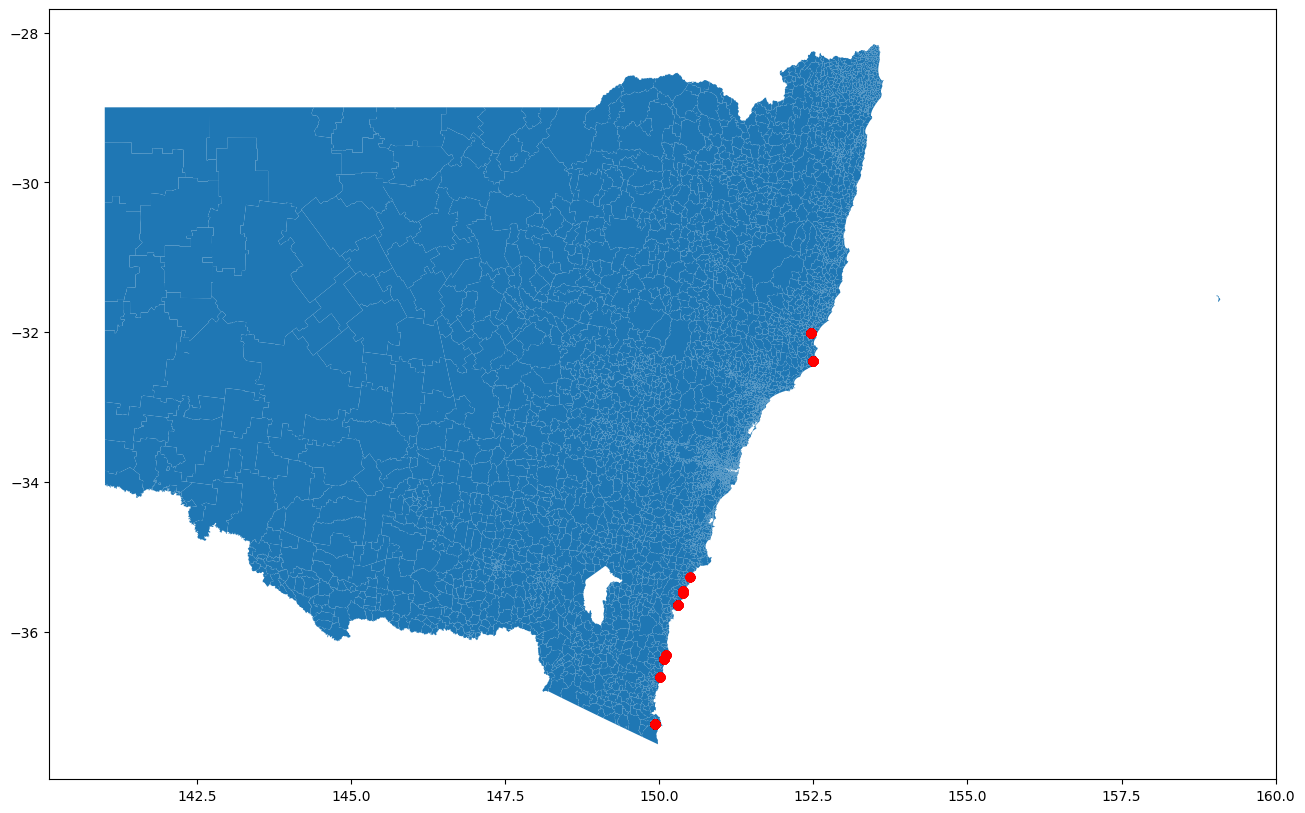

In [23]:
ax = burbs.plot()
gp.GeoDataFrame(lake_df).geometry_y.plot(ax=ax, c="r")

<Axes: >

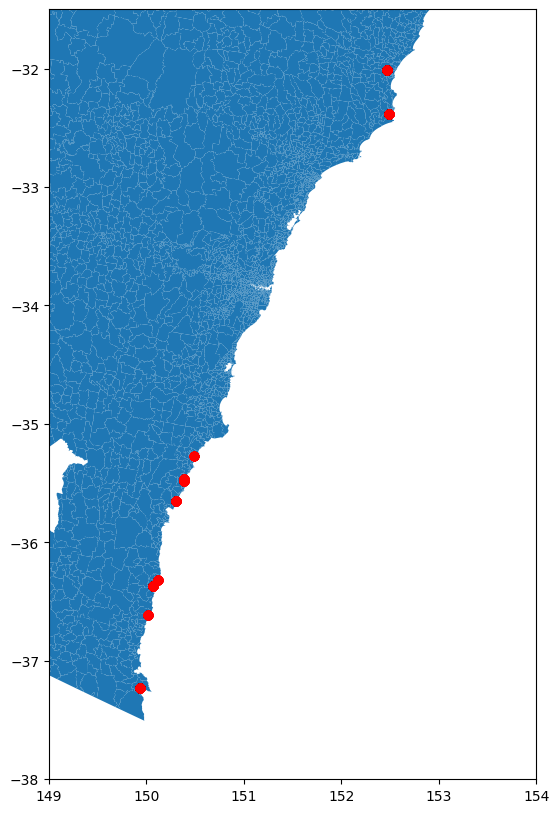

In [29]:
ax = burbs.plot()
ax.set_xlim(left=149, right=154)
ax.set_ylim(top=-31.5, bottom=-38)
gp.GeoDataFrame(lake_df).geometry_y.plot(ax=ax, c="r")

In [15]:
lakes = shapely.geometry.point.Estuary
burbs["lake_distance"] = burbs.centroid.distance(lakes)

AttributeError: module 'shapely.geometry' has no attribute 'Estuary'

In [ ]:
burbs.head()

,LC_PLY_PID,LOC_PID,DT_CREATE,LOC_NAME,LOC_CLASS,STATE,geometry,centroid
0,lcp012ec80364d0,loc56c2712d9100,2021-06-24,Aarons Pass,Gazetted Locality,NSW,"POLYGON ((149.795 -32.823, 149.794 -32.828, 14...",POINT (149.80292 -32.87910)
1,lcp17fc6b0c3f1e,loc826143633965,2022-09-28,Abbotsbury,Gazetted Locality,NSW,"POLYGON ((150.873 -33.860, 150.873 -33.861, 15...",POINT (150.86117 -33.87008)
2,lcpjL9UYhp-r6Ki,loc1e88f57cf9b1,2023-03-21,Abbotsford,Gazetted Locality,NSW,"POLYGON ((151.130 -33.844, 151.130 -33.844, 15...",POINT (151.12929 -33.85060)
3,lcp4b8df5496b4b,locdc149a0f2b20,2021-06-24,Abercrombie,Gazetted Locality,NSW,"POLYGON ((149.548 -33.384, 149.548 -33.384, 14...",POINT (149.55644 -33.38996)
4,lcp9589f7fd9898,loc5cc94911c4fa,2021-06-24,Abercrombie River,Gazetted Locality,NSW,"POLYGON ((149.369 -33.831, 149.370 -33.832, 14...",POINT (149.34770 -33.91029)


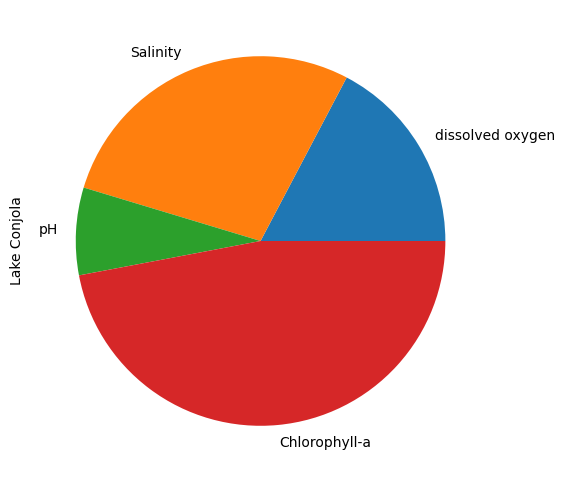

In [20]:
series = pd.Series(3 * np.random.rand(4), index=["dissolved oxygen", "Salinity", "pH", "Chlorophyll-a"], name="Lake Conjola")

series.plot.pie(figsize=(6, 6));

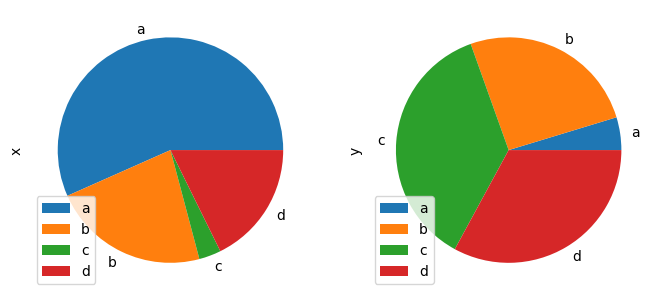

In [ ]:
df = pd.DataFrame(
    3 * np.random.rand(4, 2), index=["a", "b", "c", "d"], columns=["x", "y"]
)


df.plot.pie(subplots=True, figsize=(8, 4));
